Nhiệm vụ 1: Xây dựng mô hình SVM để phân loại các loài hoa cẩm chướng

1. Tải dữ liệu về, nạp dữ liệu, xem thông tin các feature có trong tập dữ liệu và chuẩn bị dữ liệu cho xây
dựng mô hình

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Download&Load dữ liệu iris từ datasets của scikit-learn
iris = datasets.load_iris()
# Hiển thị mô ta dữ liệu, chỉ có trong các bộ dữ liệu chuẩn và mở để học
print(iris.DESCR)
# Từ tập dữ liệu ban đầu, tách lấy ma trận biểu diễn các đặc trưng và
data = iris.data
target = iris.target
# TODO: Chia dữ liệu và nhãn thành 2 tập dữ liệu huấn luyện và dữ liệu
X_train, X_test, y_train, y_test = train_test_split(data, target,
test_size
= 0.2, random_state=101)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

2. Tạo mô hình SVM với dữ liệu đã chuẩn bị

In [2]:
from sklearn import svm
# khởi tạo mô hình phân lớp
clf = svm.SVC()
# Sử dụng phương thức 'fit' để huấn luyện mô hình với dữ liệu huấn luyện
# và nhãn huấn luyện
# fit (X,Y) với X là tập các đối tượng, Y là tập nhãn tương ứng của đối
# tượng.
clf.fit(X_train, y_train)

SVC()

3. Đánh giá độ chính xác của mô hình

In [3]:
# Giả định 'clf' là một mô hình đã được huấn luyện, ví dụ:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

# Tính độ chính xác trên tập huấn luyện và tập kiểm tra

# 1. Tính độ chính xác trên tập huấn luyện
train_acc = clf.score(X_train, y_train)

# 2. Tính độ chính xác trên tập kiểm tra (validation/test)
val_acc = clf.score(X_test, y_test)

# 3. In kết quả
print('Training accuracy: {}'.format(train_acc))
print('Validation accuracy: {}'.format(val_acc))


Training accuracy: 0.95
Validation accuracy: 0.9666666666666667


Xây dựng được một mô hình phân loại hoa Iris gần như hoàn hảo. Nó có độ chính xác cao và khả năng tổng quát hóa tốt, sẵn sàng để dự đoán cho các bông hoa mới.



4. Tìm tham số kernel tối ưu cho mô hình SVM

Best validation accuracy : 1.0 with kernel: linear


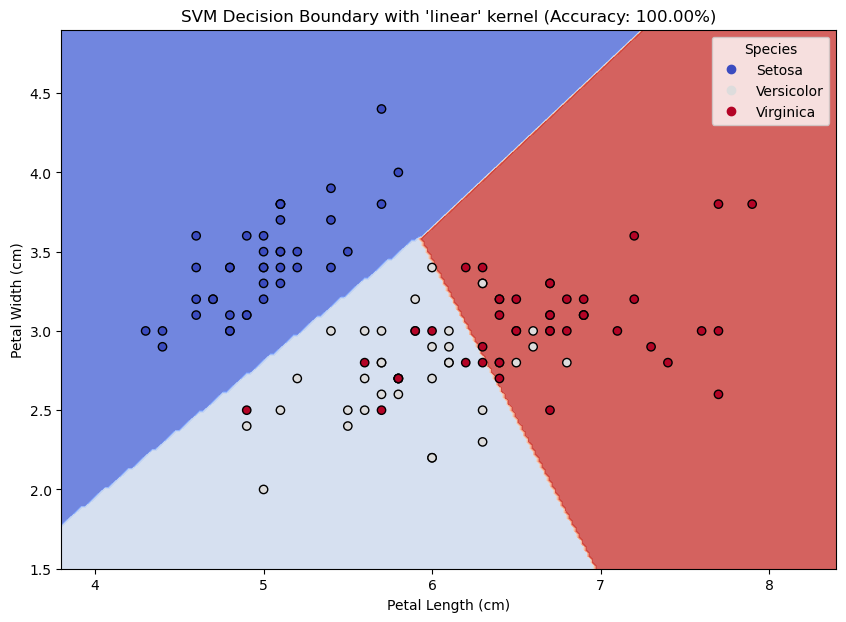

In [4]:
# best_svm, best_val_acc và best_kernel lần lượt là các biến lưu mô hình
# độ chính xác cao nhất trên tập kiểm tra và kernel tốt nhất
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None
# Huấn luyện các mô hình dựa trên dữ liệu huấn luyện và tham số kernel
# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra để tìm được
for i in range(4):
    clf = svm.SVC(kernel=kernels[i], probability=True)
    clf.fit(X_train, y_train)
    tmp_val_acc = clf.score(X_test, y_test)
    if (tmp_val_acc > best_val_acc):
        best_val_acc = tmp_val_acc
        best_svm = clf
        best_kernel = kernels[i]
# Hiển thị mô hình tốt nhất cùng với độ chính xác
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc,
best_kernel))
# Mô hình tốt nhất của bạn nên có độ chính xác xấp xỉ 86,67%import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# --- Giả định bạn đã có các bước này từ trước ---
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Đọc dữ liệu
# iris_df = pd.read_csv(r"c:\Users\Ha\Desktop\PTDL-SGU_2025\Tuan8_PRACTICE_BASIC_CLASSIFICATION_ALGORITHM\iris.csv")
# iris_df = iris_df.drop('Id', axis=1)

# # Mã hóa cột Species
# le = LabelEncoder()
# iris_df['Species'] = le.fit_transform(iris_df['Species'])

# # Chọn 2 đặc trưng để vẽ: PetalLengthCm và PetalWidthCm
# X = iris_df[['PetalLengthCm', 'PetalWidthCm']].values
# y = iris_df['Species'].values

# # Chia dữ liệu
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Tìm mô hình tốt nhất (đoạn code của bạn)
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# best_svm = None
# best_val_acc = 0.0
# best_kernel = None
# for kernel_type in kernels:
#     clf = svm.SVC(kernel=kernel_type, probability=True, random_state=42)
#     clf.fit(X_train, y_train)
#     tmp_val_acc = clf.score(X_test, y_test)
#     if tmp_val_acc > best_val_acc:
#         best_val_acc = tmp_val_acc
#         best_svm = clf
#         best_kernel = kernel_type
# ----------------------------------------------------

# Lấy mô hình tốt nhất đã được huấn luyện (best_svm)
# Chúng ta sẽ huấn luyện lại nó trên 2 đặc trưng đã chọn để trực quan hóa
X_vis = X_train[:, :2] # Chỉ lấy 2 cột đầu (PetalLength và PetalWidth)
y_vis = y_train

# Huấn luyện lại mô hình SVM với kernel tốt nhất trên dữ liệu 2D
# Điều này là cần thiết để hàm predict có thể hoạt động trên lưới 2D
svm_vis = svm.SVC(kernel=best_kernel, C=1.0, gamma='auto')
svm_vis.fit(X_vis, y_vis)


# --- Bắt đầu phần vẽ ---

# 1. Tạo một lưới (mesh grid) để vẽ
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
h = 0.02  # Độ mịn của lưới
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 2. Dự đoán trên từng điểm của lưới
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3. Vẽ biểu đồ
plt.figure(figsize=(10, 7))

# Vẽ các vùng quyết định
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Vẽ các điểm dữ liệu huấn luyện
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')

# Thêm chú thích và tiêu đề
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title(f"SVM Decision Boundary with '{best_kernel}' kernel (Accuracy: {best_val_acc*100:.2f}%)")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Tạo legend cho các loài hoa
# Giả định le.classes_ đã được tạo từ bước LabelEncoder
# le.classes_ sẽ là ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
legend_elements = scatter.legend_elements()
# Cần đảm bảo le.classes_ tồn tại hoặc thay bằng list thủ công
try:
    legend_labels = le.classes_
except NameError:
    legend_labels = ['Setosa', 'Versicolor', 'Virginica'] # Thay thế nếu le không tồn tại
plt.legend(handles=legend_elements[0], labels=list(legend_labels), title="Species")

plt.show()


Biểu đồ này cho thấy một cách trực quan tại sao mô hình của bạn đạt độ chính xác 100%:
Phân tách hoàn hảo: Các cụm điểm của mỗi loài hoa nằm gọn trong vùng màu tương ứng của chúng. Không có điểm nào bị "lạc" sang vùng màu của loài khác.
Tuyến tính hóa: Các loài hoa trong bộ dữ liệu Iris (dựa trên 2 đặc trưng này) có thể được phân tách một cách hoàn hảo chỉ bằng các đường thẳng. Điều này giải thích tại sao kernel='linear' lại cho kết quả tốt nhất.
Tóm lại, biểu đồ này không chỉ vẽ dữ liệu, mà nó còn vẽ ra "suy nghĩ" của mô hình, giúp bạn hiểu được cách nó đưa ra quyết định phân loại.

Bài toán 2: Xây dựng mô hình dựa vào giải thuật SVM trên dữ liệu hình ảnh Handwritten-Digit-MNIST-
SVM. Dữ liệu lấy từ https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm

Nhiệm vụ 1: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu là hình ảnh
1. Import thư viện và tải dữ liệu là tập các hình ảnh viết tay từ số 0 đến số 9

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

2. Khảo sát thông tin có trong digits

In [6]:
#thông tin toàn bộ dữ liệu đã tải về
digits
#xem thông tin của một hình dưới dạng ma trận 8 x 8
digits['data'][0].reshape(8,8)


#xem thông tin của một hình dưới dạng mảng
digits['data'][0]
#xem thông tin 9 nhãn đầu tiên
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Dữ liệu đã có sẵn bên trong thư viện scikit-learn rồi

3. Vẽ ra hình dựa vào dữ liệu dạng ma trận 8 x 8

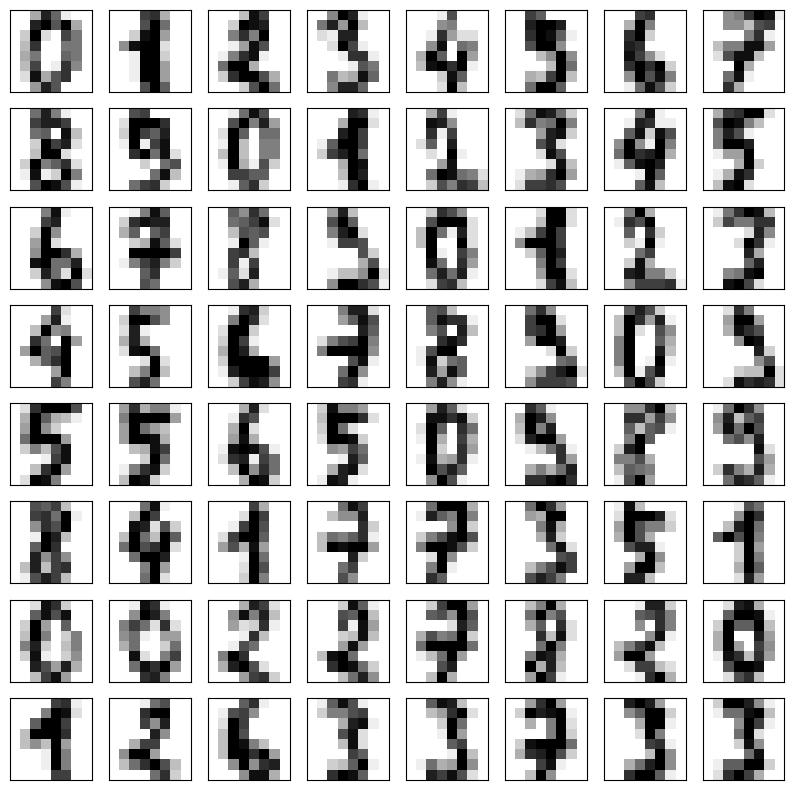

In [7]:

# Mỗi chữ số được biểu diễn trong digit.images dưới dạng ma trận 8x8 = 64 pixel. 
# Mỗi giá trị trong số 64 giá trị này đại diện cho một thang độ xám. 
# Thang độ xám sau đó được vẽ theo đúng thang độ bằng phương pháp 
fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Tóm lại: Đoạn code này là một ví dụ kinh điển về cách trực quan hóa một bộ dữ liệu hình ảnh. Nó lặp qua từng hình ảnh trong bộ dữ liệu và vẽ chúng lên một lưới để bạn có thể xem chúng một cách tổng quan.

4. Vẽ một ảnh từ ma trận 8 x 8

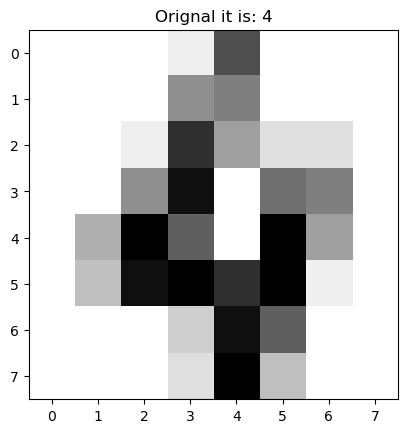

In [8]:

# Hàm vẽ 1 ảnh có kích thước 8 x 8 (ảnh lấy từ ma images)
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()
# vẽ ảnh ở vị trí thứ 4
view_digit(4)

Nhãn (Label): Tiêu đề của bức ảnh là Original it is: 4. Đây chính là "sự thật" (ground truth) mà mô hình cần dự đoán.
Bài toán phân loại đa lớp: Bằng cách vẽ các ảnh khác nhau (ví dụ view_digit(0), view_digit(1),...), bạn sẽ thấy có 10 lớp (từ 0 đến 9) mà mô hình cần phân biệt. Đây là một bài toán phân loại đa lớp (multi-class classification).

Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9

1. Chuẩn bị dữ liệu và xây dựng mô hình SVM

In [9]:
# Thực hiện import các thư viện cần thiết để xây dựng mô hình SVM
# Thực hiện bước 1 của nhiệm vụ 1
from sklearn import svm
main_data = digits['data']
targets = digits['target']
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and
# classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500])
predictions = svc.predict(main_data[1501:])
# list(zip(predictions , targets[1501:]))

2. Đánh giá hiệu quả của mô hình với Confusion Matrix   

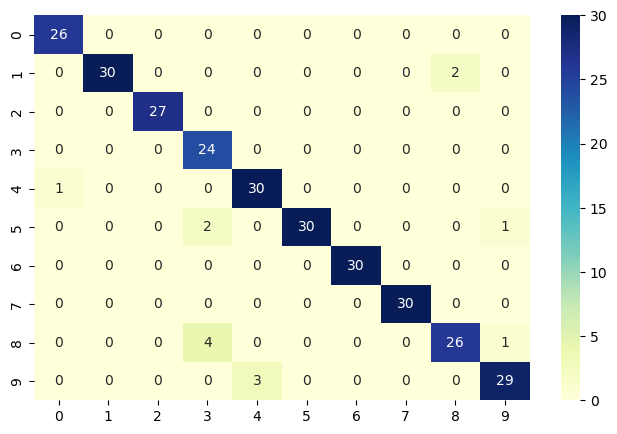

In [10]:
# Nhập hàm để tính toán ma trận nhầm lẫn từ scikit-learn
from sklearn.metrics import confusion_matrix
# Nhập thư viện seaborn để vẽ biểu đồ đẹp hơn (heatmap)
import seaborn as sns

# --- Giả định bạn đã có các biến sau từ các bước trước ---
# predictions: Các nhãn mà mô hình của bạn đã dự đoán.
# targets: Toàn bộ nhãn thực tế của bộ dữ liệu digits.
# targets[1501:]: Đây là phần nhãn của tập dữ liệu kiểm thử (test set).
# -----------------------------------------------------------

# 1. Tính toán Ma trận nhầm lẫn
# Hàm này so sánh nhãn dự đoán (predictions) với nhãn thực tế (targets[1501:])
# và trả về một ma trận (dưới dạng mảng NumPy)
cm = confusion_matrix(predictions, targets[1501:])

# 2. Chuyển ma trận thành một Pandas DataFrame để dễ xử lý và hiển thị
# Điều này giúp chúng ta có thể thêm tên hàng/cột nếu cần.
conf_matrix = pd.DataFrame(data = cm)

# 3. Chuẩn bị để vẽ
# Tạo một khung hình mới với kích thước 8x5 inches để biểu đồ dễ nhìn hơn.
plt.figure(figsize = (8,5))

# 4. Vẽ Heatmap (Biểu đồ nhiệt)
# sns.heatmap là hàm của Seaborn để vẽ ma trận dưới dạng các ô màu.
# - conf_matrix: Dữ liệu ma trận cần vẽ.
# - annot=True: Hiển thị giá trị số (annotation) bên trong mỗi ô.
# - fmt='d': Định dạng các số hiển thị là số nguyên (decimal).
# - cmap="YlGnBu": Chọn bảng màu là "Yellow-Green-Blue". Các ô có giá trị cao hơn
#                  sẽ có màu xanh đậm hơn, giúp dễ dàng nhận biết.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu");


-Hiệu suất tổng thể: Nhìn vào đường chéo chính, bạn có thể thấy ngay các lớp nào mô hình nhận dạng tốt (số lượng lớn) và lớp nào kém hơn.
-Xác định các cặp nhầm lẫn phổ biến: Bằng cách tìm các ô có giá trị lớn nhất nằm ngoài đường chéo chính, bạn có thể xác định chính xác mô hình đang gặp khó khăn trong việc phân biệt những cặp chữ số nào.
-Ví dụ, nếu ô ở (hàng 8, cột 1) có giá trị là 5, điều đó có nghĩa là có 5 lần mô hình nhìn thấy số "8" nhưng lại dự đoán nó là số "1". Đây là một lỗi có thể hiểu được vì số 8 và 1 có thể có nét viết tay khá giống nhau.
-Một cặp khác cũng thường bị nhầm là "5" và "3", hoặc "9" và "4".
-Đánh giá sự cân bằng của lỗi: Mô hình có xu hướng nhầm một lớp cụ thể thành nhiều lớp khác nhau, hay chỉ nhầm lẫn với một lớp duy nhất?
-Định hướng cải tiến mô hình:
-Nếu mô hình thường xuyên nhầm lẫn giữa số "8" và "1", bạn có thể thu thập thêm dữ liệu cho hai chữ số này, đặc biệt là các trường hợp viết tay khó phân biệt.
-Bạn cũng có thể thử các kỹ thuật xử lý ảnh để làm nổi bật các đặc trưng khác biệt giữa chúng trước khi đưa vào mô hình

3. In kết quả dạng văn bản

In [11]:
# Nhập hàm classification_report từ thư viện scikit-learn
from sklearn.metrics import classification_report

# --- Giả định bạn đã có các biến sau từ các bước trước ---
# predictions: Các nhãn mà mô hình của bạn đã dự đoán trên tập kiểm thử.
# targets: Toàn bộ nhãn thực tế của bộ dữ liệu digits.
# targets[1501:]: Đây là phần nhãn của tập dữ liệu kiểm thử (test set) tương ứng.
# -----------------------------------------------------------

# In ra báo cáo phân loại
# Hàm này so sánh nhãn dự đoán (predictions) với nhãn thực tế (targets[1501:])
# và tạo ra một báo cáo dạng văn bản.
print(classification_report(predictions, targets[1501:]))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



classification_report là một công cụ chẩn đoán tuyệt vời. Nó không chỉ cho bạn biết mô hình tốt như thế nào (accuracy), mà còn chỉ ra chính xác nó tốt ở đâu và yếu ở đâu (precision/recall/f1-score trên từng lớp), từ đó giúp bạn có định hướng để cải thiện mô hình